In [1]:
from zipfile import ZipFile

In [2]:
import pandas as pd

In [3]:
file_name="Loan_Prediction_pre-processing.zip"


In [4]:
with ZipFile(file_name,'r') as zip:
    zip.printdir()
    zip.extract("Loan Prediction pre-processing/loan_data.csv")

File Name                                             Modified             Size
Loan Prediction pre-processing/                2020-03-30 14:05:18            0
Loan Prediction pre-processing/Loan_Prediction_Data_Preparation.ipynb 2020-03-30 14:04:44        29072
Loan Prediction pre-processing/loan_data.csv   2020-03-30 14:03:40        38011


In [5]:
dataset=pd.read_csv("Loan Prediction pre-processing/loan_data.csv")

In [6]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
dataset.shape

(614, 13)

In [8]:
#check missing values
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#check any categorical variable
dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
# Filling the missing value with mode for categorical variable

dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace=True)
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace=True)

In [11]:
#Filling missing value with mean for continous variable
dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(),inplace=True)

In [12]:
#check the col again
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
#Convert categorical variable to numeric columns
#Nominal categorical(Ranking makes no sense)-- use dummy encoding
#Ordinal categorical(Ranking make sense)--Label encoding
dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [15]:
# Nominal --Gender,married,Property_Area
#ordinal--Dependent,Education,Self_Employed,loan_status

dataset=pd.get_dummies(dataset,columns=['Gender','Married','Property_Area'],drop_first=True)
dataset.dtypes

Loan_ID                     object
Dependents                  object
Education                   object
Self_Employed               object
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                 object
Gender_Male                  uint8
Married_Yes                  uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [16]:
print(set(dataset.Dependents))
print(set(dataset.Education))
print(set(dataset.Self_Employed))
set(dataset.Loan_Status)

{'1', '0', '2', '3+'}
{'Not Graduate', 'Graduate'}
{'Yes', 'No'}


{'N', 'Y'}

In [17]:
dataset['Dependents']=dataset['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})
dataset['Education']=dataset['Education'].map({'Graduate':1, 'Not Graduate':0})
dataset['Self_Employed']=dataset['Self_Employed'].map({'No':0, 'Yes':1})
dataset['Loan_Status']=dataset['Loan_Status'].map({'N':0, 'Y':1})
dataset.dtypes

Loan_ID                     object
Dependents                   int64
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
Gender_Male                  uint8
Married_Yes                  uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [18]:
dataset.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1,0,0,1
1,LP001003,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,1,1,0,0
2,LP001005,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1,1,0,1
3,LP001006,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,1
4,LP001008,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1,0,0,1


In [19]:
# Bringing all variable to 0 to 1
#Xnorm= (X-Xmin)/(Xmax-Xmin)

dataset['Dependents']= (dataset['Dependents']-dataset['Dependents'].min())/(dataset['Dependents'].max()-dataset['Dependents'].min())

In [21]:
for i in dataset.columns[1:]:
    dataset[i]=(dataset[i]-dataset[i].min())/(dataset[i].max()-dataset[i].min())

In [22]:
dataset.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0,0.0,0.0,1.0
1,LP001003,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,1.0,1.0,0.0,0.0
2,LP001005,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0,1.0,0.0,1.0
3,LP001006,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0,1.0,0.0,1.0
4,LP001008,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0,0.0,0.0,1.0


In [23]:
#saving the pre-processed data
dataset.to_csv("pre-processed_dataset.csv",index=False)

# Neural Network

In [25]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
dataset.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0,0.0,0.0,1.0
1,LP001003,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,1.0,1.0,0.0,0.0
2,LP001005,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0,1.0,0.0,1.0
3,LP001006,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0,1.0,0.0,1.0
4,LP001008,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0,0.0,0.0,1.0


In [27]:
dataset.isnull().sum()

Loan_ID                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Gender_Male                0
Married_Yes                0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [28]:
dataset.dtypes

Loan_ID                     object
Dependents                 float64
Education                  float64
Self_Employed              float64
ApplicantIncome            float64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                float64
Gender_Male                float64
Married_Yes                float64
Property_Area_Semiurban    float64
Property_Area_Urban        float64
dtype: object

In [29]:
#Id has all unique value hence drop the data

dataset=dataset.drop('Loan_ID',axis=1)

In [30]:
dataset.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0,0.0,0.0,1.0
1,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,1.0,1.0,0.0,0.0
2,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0,1.0,0.0,1.0
3,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0,1.0,0.0,1.0
4,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0,0.0,0.0,1.0


In [32]:
dataset.shape

(614, 13)

In [34]:
#store independent variable in X
X=dataset.drop('Loan_Status',axis=1)
#store dependet variable in X
y=dataset['Loan_Status']

print(X.shape,y.shape)

(614, 12) (614,)


In [36]:
# Creating training and validation set
#stratify ensures distribution of classes in train and test are similar
#random to regenerate same train and validation set
#test_size is 0.2 will keep 20% in validation & 80% in train
X_train,x_test,y_train,y_test=train_test_split(X,y,stratify=dataset['Loan_Status'],random_state=10,test_size=0.2)

print(X_train.shape,y_train.shape,x_test.shape,y_test.shape)

(491, 12) (491,) (123, 12) (123,)


In [39]:
# Architecture of Neural problem
import keras
print(keras.__version__)

Using TensorFlow backend.


2.3.1


In [40]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [42]:
from keras.models import Sequential 

In [43]:
#import different layers from keras
from keras.layers import InputLayer,Dense # Dense layers are usefull for defining hidden as well as output layer

In [45]:
#Number of input Neuron
X_train.shape

(491, 12)

In [46]:
#Number of Feature in dataset
X_train.shape[1]

12

In [47]:
#Defining input neuron
input_neuron= X_train.shape[1]

In [48]:
#Defining output layer
#Loan prediction is a binary classification problem, so only one neuron in output layer
output_neuron=1

In [51]:
#number of hidden layer and hidden neuron
# it is the hyper parameter.n we can pick hidden neuron and hidden layer on our own
#Define Hidden layer and hidden neuron in each layer
number_of_hidden_layers=2
neuron_hidden_layer1=10
neuron_hidden_layer2=5

In [50]:
#choose activation Function for different layers
#As it is binary classification problem, choosing sigmoid in output layer


In [52]:
#Defining the architecture of the neural network
model=Sequential()
model.add(InputLayer(input_shape=(input_neuron,)))
model.add(Dense(units=neuron_hidden_layer1,activation='relu'))
model.add(Dense(units=neuron_hidden_layer2,activation='relu'))
model.add(Dense(units=output_neuron,activation='sigmoid'))

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [54]:
#input neuron* hidden layer+b = Param
12*10+10


130

In [55]:
#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [57]:
#Training the model
model_history=model.fit(X_train,y_train,validation_data=(x_test,y_test),epochs=50)

Train on 491 samples, validate on 123 samples
Epoch 1/50
491/491 [==============================] - 11s 22ms/step - loss: 0.6821 - accuracy: 0.7128 - val_loss: 0.6734 - val_accuracy: 0.7154
Epoch 2/50
491/491 [==============================] - 0s 153us/step - loss: 0.6742 - accuracy: 0.7169 - val_loss: 0.6639 - val_accuracy: 0.7317
Epoch 3/50
491/491 [==============================] - 0s 102us/step - loss: 0.6656 - accuracy: 0.7210 - val_loss: 0.6526 - val_accuracy: 0.7480
Epoch 4/50
491/491 [==============================] - 0s 62us/step - loss: 0.6540 - accuracy: 0.7251 - val_loss: 0.6374 - val_accuracy: 0.7398
Epoch 5/50
491/491 [==============================] - 0s 102us/step - loss: 0.6375 - accuracy: 0.7128 - val_loss: 0.6118 - val_accuracy: 0.7236
Epoch 6/50
491/491 [==============================] - 0s 82us/step - loss: 0.6119 - accuracy: 0.7006 - val_loss: 0.5843 - val_accuracy: 0.6911
Epoch 7/50
491/491 [==============================] - 0s 102us/step - loss: 0.5899 - accurac

In [59]:
#Evaluating model performance on validation set
prediction=model.predict_classes(x_test)
accuracy_score(y_test,prediction)

0.8130081300813008

# Visualizing Model Performance

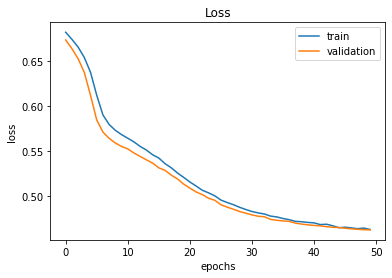

In [61]:
#Summarize history for losses
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','validation'],loc='upper right')
plt.show()

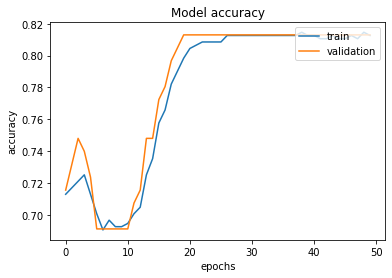

In [63]:
#Summarize history for losses
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'],loc='upper right')
plt.show()